/usr/share/fonts/SimHei.ttf
821
   price             定额单价  定量单价             量额比
0     25  25.000000000000  25.0  1.000000000000
1     86  38.738738738739  55.5  1.432674418605
2     54  42.767681728880  55.0  1.286017800746
3     63  46.501115752131  57.0  1.225777039498
4     18  35.316970571364  49.2  1.393097969731
------ 0      1.000000000000
1      1.432674418605
2      1.286017800746
3      1.225777039498
4      1.393097969731
5      1.323546061078
6      2.485813617907
7      2.282499956257
8      2.181675715349
9      2.213501438046
10     2.099599074535
11     2.065046855596
12     2.008971783622
13     1.973945671103
14     2.583327891364
15     2.509454967345
16     2.602809471607
17     3.385538912598
18     3.272798364617
19     3.134800062767
20     3.008107500679
21     3.150409522504
22     3.085996637390
23     2.976367225958
24     3.037721390238
25     2.940470762897
26     2.994280154896
27     2.985523203447
28     3.027157237670
29     2.945586763711
            .

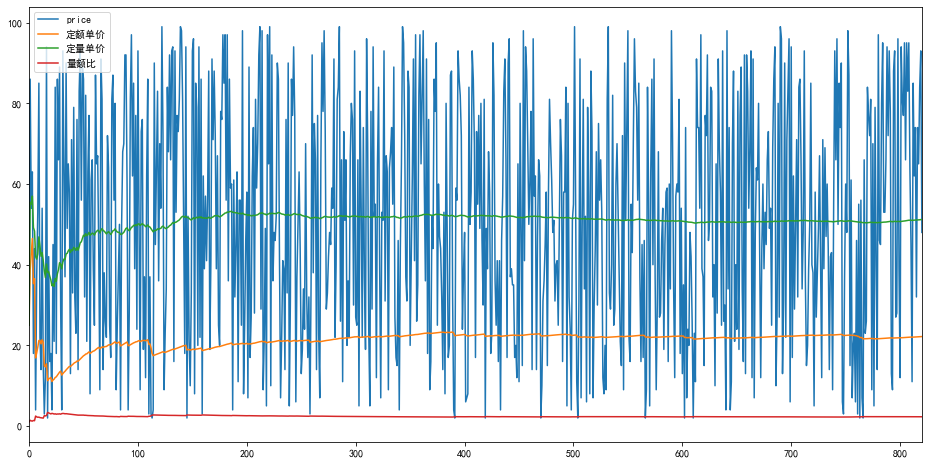

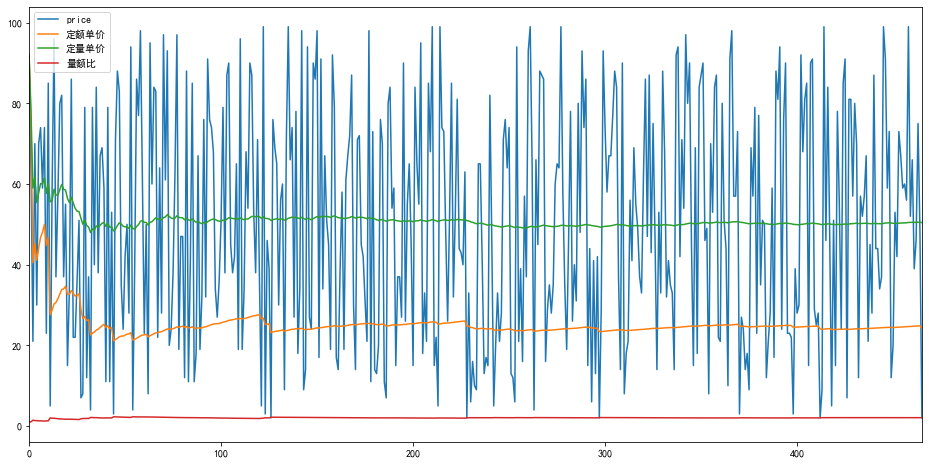

In [7]:
# %%timeit
########-----展现平均持有单价变化-----########
import eplot
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

def eachtime():
    # 随机长度
    nday = random.randint(10,1000) #交易天数 通常在四年以内
    minpi,maxpi= 2,100 #价格最小最大值
    # 随机矩阵 n 行 1 列
    rdarr = np.random.randint(minpi, maxpi, size=(nday,))
    df = pd.DataFrame(rdarr, columns=['price'])
    pd.set_option('precision', 12) #小数点精度
    
    #### 定额方式 ####
    df['amt_p-rec'] = 1.0/df['price'] # 价格倒数 p-rec
    df['amt_sum-vol'] = df['amt_p-rec'].cumsum() #定额总量，价格倒数累加求和
    df['定额单价'] = (df.index + 1)/df['amt_sum-vol'] #定额平均单价 = 总价/总量
    
    #### 定量方式 ####
    df['vol_sum-vol'] = df['price'].cumsum() # 定量总价
    df['定量单价'] = df['vol_sum-vol']/(df.index + 1) #定量平均单价 = 总价/总量
    
    df['量额比'] = df['定量单价']/df['定额单价'] 
    rstdf = df[['price','定额单价','定量单价','量额比']]
    print(nday) 
    rstdf.plot()
    print(rstdf.head())
    print("------", df['量额比'][:-1])

def init_font():
    font_name = 'SimHei' 
    plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    plt.rcParams['font.sans-serif'].append(font_name)
    plt.rcParams['figure.figsize'] = 16, 8
    import matplotlib.font_manager
    matplotlib.font_manager._rebuild()
    print(matplotlib.font_manager.findfont(font_name))
    
def main(): 
    init_font()
    testcnt = 2 #000
    for i in range(testcnt):
        eachtime() #算单条
    print("-end-")

if __name__ == '__main__':
    main()

In [2]:
!pip install eplot

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 163kB 1.4MB/s eta 0:00:01    |██████▏                         | 30kB 799kB/s eta 0:00:01
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13702 sha256=ff0153f831f7093fb2c866a82304fd2a835eb0429a3760e05b8b9101bc0fe178
  Stored in directory: /home/jovyan/.cache/pip/wheels/c2/61/ba/a04710c9b1a6b45ae6b72548dc1a0dc1fed170ee9c066f97fc
Successfully built prettytable


In [9]:
import matplotlib.pyplot as plt
font_name = 'SimHei' 
plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.sans-serif'].append(font_name)

print(plt.rcParams['font.sans-serif'])
print(plt.rcParams['font.family'])

['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif', 'SimHei']
['SimHei']


Text(0.5, 1.0, 'Whoo Hoo!!!')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


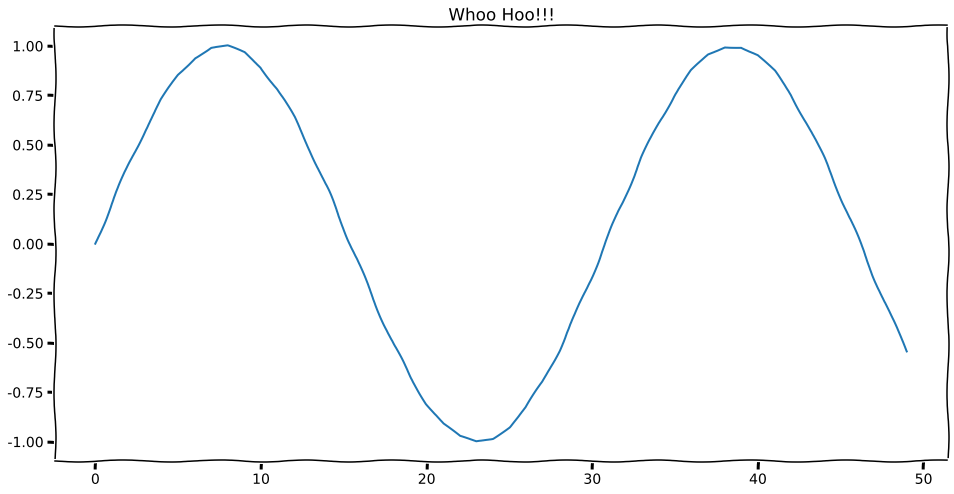

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.xkcd()
plt.plot(np.sin(np.linspace(0, 10)))
plt.title('Whoo Hoo!!!')

-end-
main
Elapsed time: 1.1761082999873906


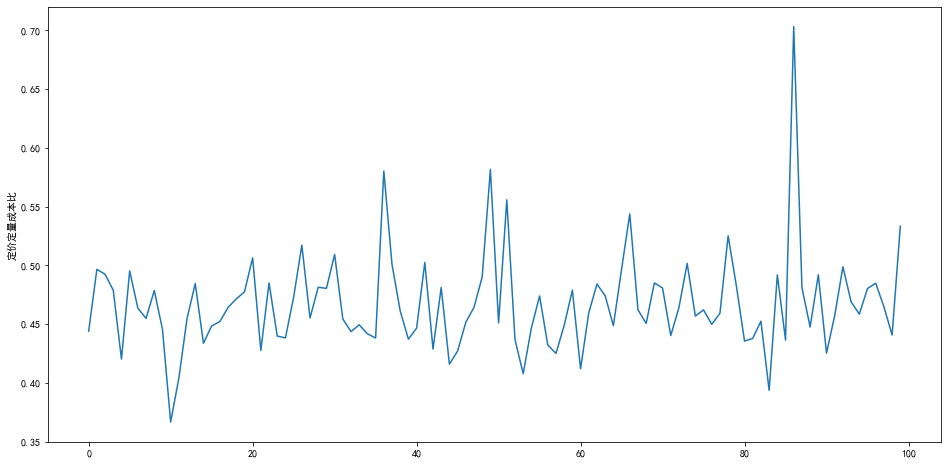

In [41]:
########-----量额比-----########
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

def eachtime():
    # 随机长度
    nday = random.randint(10,1000) #交易天数 通常在四年以内
    minpi,maxpi= 2,100 #价格最小最大值
    # 随机矩阵 n 行 1 列
    rdarr = np.random.randint(minpi, maxpi, size=(nday,))
    df = pd.DataFrame(rdarr, columns=['price'])
    pd.set_option('precision', 12) #小数点精度
    
    #### 定额方式 ####
    df['amt_p-rec'] = 1.0/df['price'] # 价格倒数 p-rec
    df['amt_sum-vol'] = df['amt_p-rec'].cumsum() #定额总量，价格倒数累加求和
    df['定额单价'] = (df.index + 1)/df['amt_sum-vol'] #定额平均单价 = 总价/总量
    
    #### 定量方式 ####
    df['vol_sum-vol'] = df['price'].cumsum() # 定量总价
    df['定量单价'] = df['vol_sum-vol']/(df.index + 1) #定量平均单价 = 总价/总量
    rstlb = '额量比'
    df[rstlb] = df['定额单价']/df['定量单价'] 
#     print("------", df['量额比'].iloc(-1))
    rst = df.iloc[-1].at[rstlb] #本次最终量价比
#     print(rst)
    return rst

def init_font():
    font_name = 'SimHei' 
    plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    plt.rcParams['font.sans-serif'].append(font_name)
    plt.rcParams['figure.figsize'] = 16, 8
    import matplotlib.font_manager
    matplotlib.font_manager._rebuild()
#     print(matplotlib.font_manager.findfont(font_name))

def _time_analyze_(func):
    t1_start = time.perf_counter()  
    func()
    t1_stop = time.perf_counter() 
    print(func.__name__)
    print("Elapsed time:", t1_stop - t1_start)  

def main(): 
    init_font()
    testcnt = 100 #计算次数
    arr=[]
    for i in range(testcnt):
        arr.append(eachtime()) #算单条

    plt.ylabel('定价定量成本比')
    plt.plot(arr)
#     plt.show()
    print("-end-")

if __name__ == '__main__':
    _time_analyze_(main)